In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scipyio
import seaborn as sns
import pandas as pd
from libemg.feature_extractor import FeatureExtractor
from libemg.utils import get_windows

In [26]:
# Loading the mat file
matdata = scipyio.loadmat('chaity_mam_supination_hand_close.mat')

# keys of this matdata
matdata.keys()

dict_keys(['__header__', '__version__', '__globals__', 'value'])

In [27]:
values = np.transpose(matdata['value'])
values.shape

(8000, 8)

In [28]:
df = pd.DataFrame(values)
df

,0,1,2,3,4,5,6,7
0,-0.004883,-0.014648,-0.009766,-0.009766,0.004883,0.000000,0.004883,-0.009766
1,-0.004883,-0.014648,-0.009766,-0.009766,-0.004883,0.004883,-0.009766,0.000000
2,-0.004883,-0.004883,-0.009766,-0.009766,-0.004883,-0.004883,-0.004883,-0.014648
3,-0.004883,-0.014648,-0.009766,-0.014648,-0.004883,-0.009766,-0.009766,-0.014648
4,-0.004883,-0.009766,-0.009766,-0.009766,-0.004883,-0.014648,0.014648,-0.004883
...,...,...,...,...,...,...,...,...
7995,-0.004883,0.000000,0.009766,0.048828,0.004883,0.073242,0.092773,0.112305
7996,0.014648,0.009766,-0.009766,0.068359,-0.024414,0.063477,0.151367,0.029297
7997,0.034180,0.014648,0.009766,0.078125,-0.053711,-0.004883,0.058594,-0.024414
7998,0.043945,0.024414,0.043945,0.097656,-0.058594,-0.029297,0.029297,-0.043945


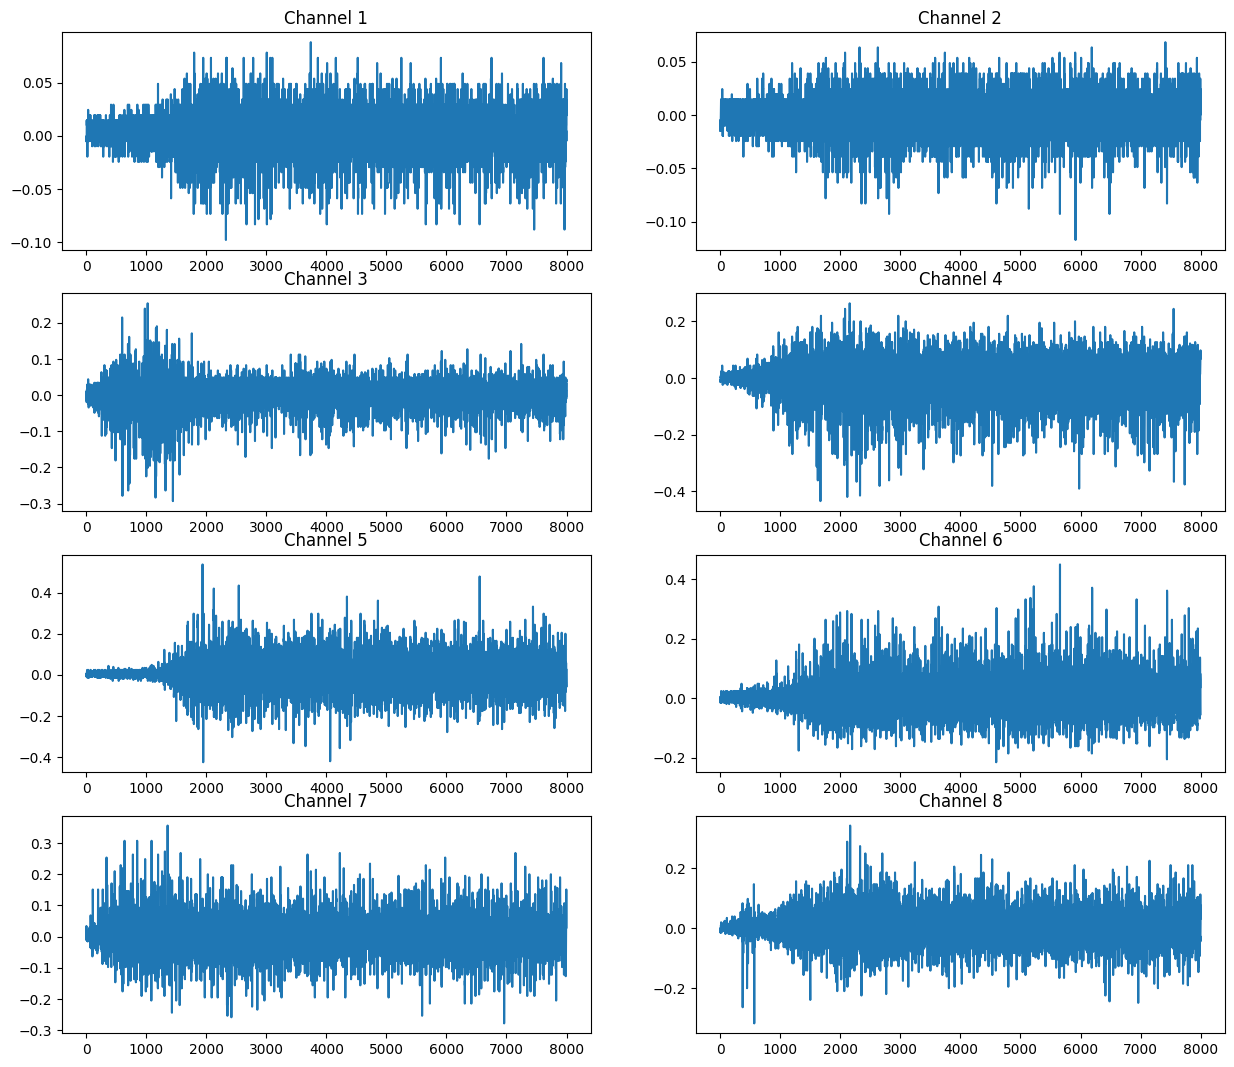

In [29]:
plt.figure(figsize=(15, 13))
for i in range(8):
    plt.subplot(4, 2, i+1)
    plt.plot(df[i])
    plt.title("Channel "+str(i+1))

plt.show()

In [72]:
windows = get_windows(values, 100, 50)
windows.shape

(159, 8, 100)

In [73]:
fe = FeatureExtractor()
fe.get_feature_list()

['MAV',
 'ZC',
 'SSC',
 'WL',
 'LS',
 'MFL',
 'MSR',
 'WAMP',
 'RMS',
 'IAV',
 'DASDV',
 'VAR',
 'M0',
 'M2',
 'M4',
 'SPARSI',
 'IRF',
 'WLF',
 'AR',
 'CC',
 'LD',
 'MAVFD',
 'MAVSLP',
 'MDF',
 'MNF',
 'MNP',
 'MPK',
 'SKEW',
 'KURT',
 'RMSPHASOR',
 'PAP',
 'WLPHASOR',
 'MZP',
 'TM',
 'SM',
 'SAMPEN',
 'FUZZYEN',
 'DFTR',
 'ISD',
 'COR',
 'MDIFF',
 'MLK',
 'ACT',
 'MOB',
 'COMP',
 'WENG',
 'WV',
 'WWL',
 'WENT']

In [75]:
feature_list = ['MAV', 'SSC', 'ZC', 'WL']
features = fe.extract_features(feature_list, windows)

In [76]:
type(features['MAV'])

numpy.ndarray

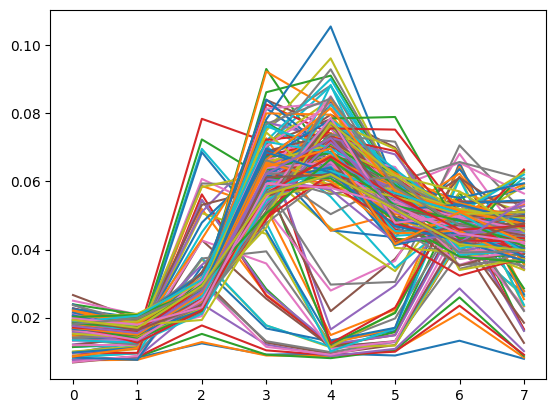

In [80]:
plt.plot(np.transpose(features['MAV']))
#plt.plot(np.transpose(features['MAV']))
#plt.plot(np.transpose(features['WL']))